In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [3]:
# Load dataset
dataset = pd.read_csv('diagnosis.csv')

# Preview dataset
print("First 10 rows of the dataset:")
print(dataset.head(10))

print("\nDataset columns:")
print(dataset.columns)

print("\nDataset shape:", dataset.shape)

print("\nDataset info:")
print(dataset.info())


First 10 rows of the dataset:
         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   
5    843786          1        12.45         15.70           82.57      477.1   
6    844359          1        18.25         19.98          119.60     1040.0   
7  84458202          1        13.71         20.83           90.20      577.9   
8    844981          1        13.00         21.82           87.50      519.8   
9  84501001          1        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0

In [4]:
# Check for missing and duplicate values
print("\nMissing values in each column:")
null_values = dataset.isnull().sum()
print(null_values)

print("\nDuplicate rows in the dataset:", dataset.duplicated().sum())



Missing values in each column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Duplicate rows in the data

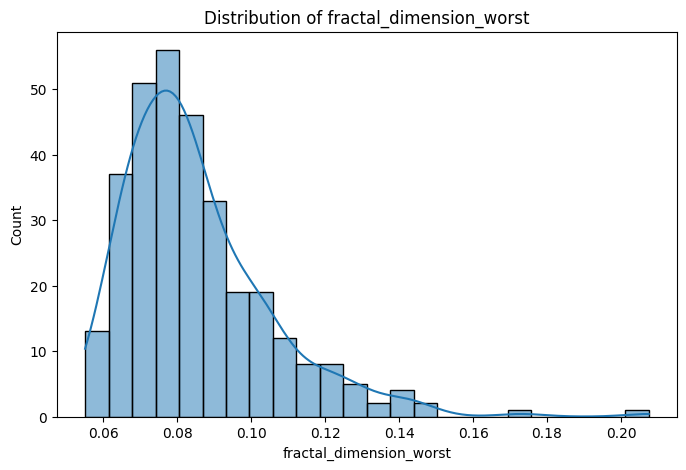

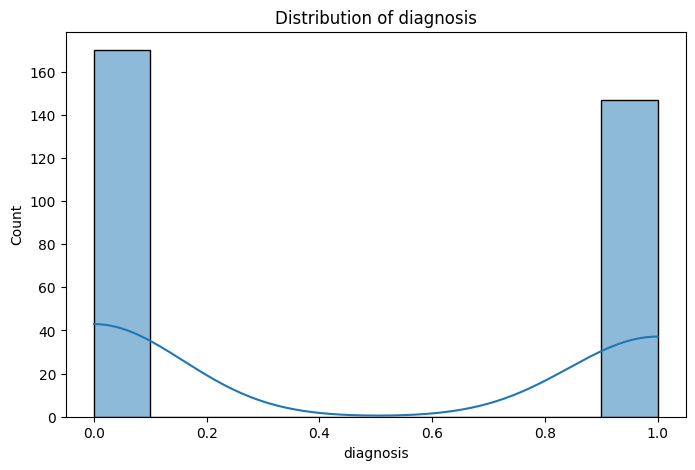

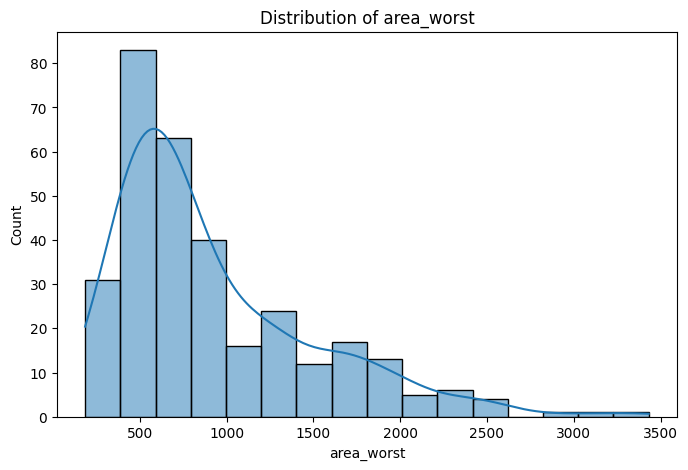

In [10]:
# Distribution plots 
important_columns = ['fractal_dimension_worst', 'diagnosis', 'area_worst'] 
for column in important_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(dataset[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

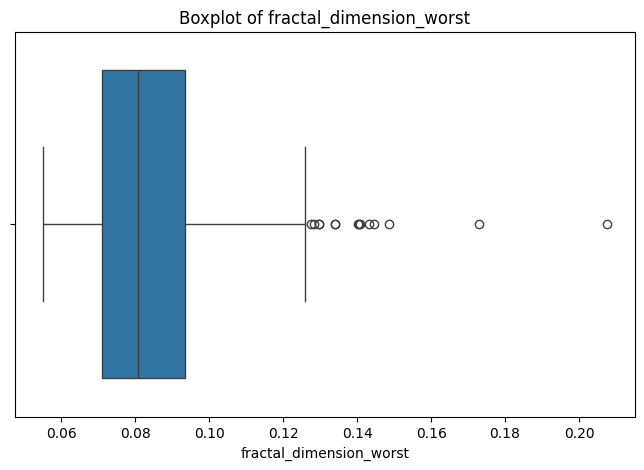

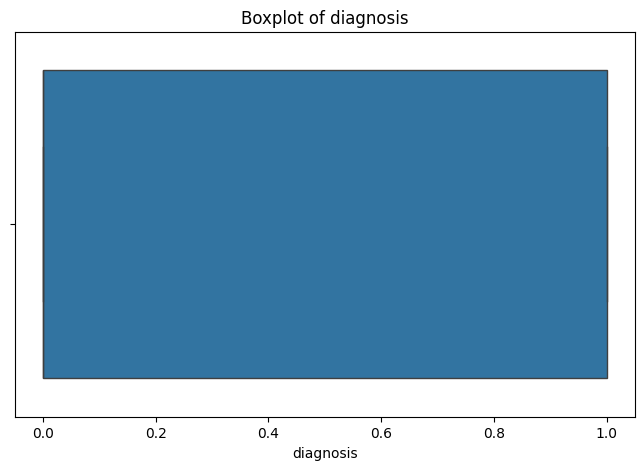

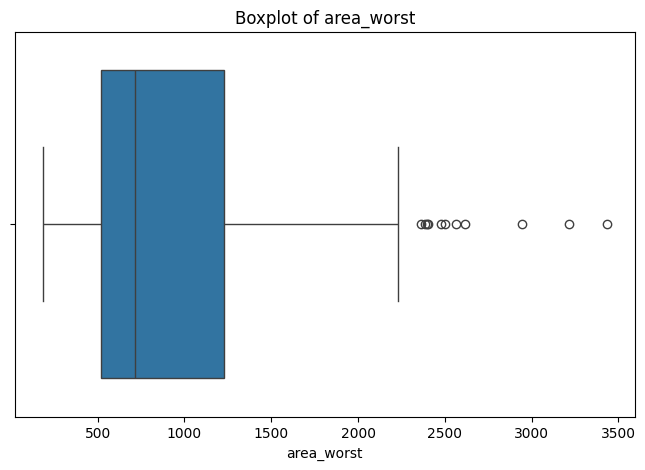

In [11]:
# Boxplots to check for outliers
for column in important_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=dataset[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

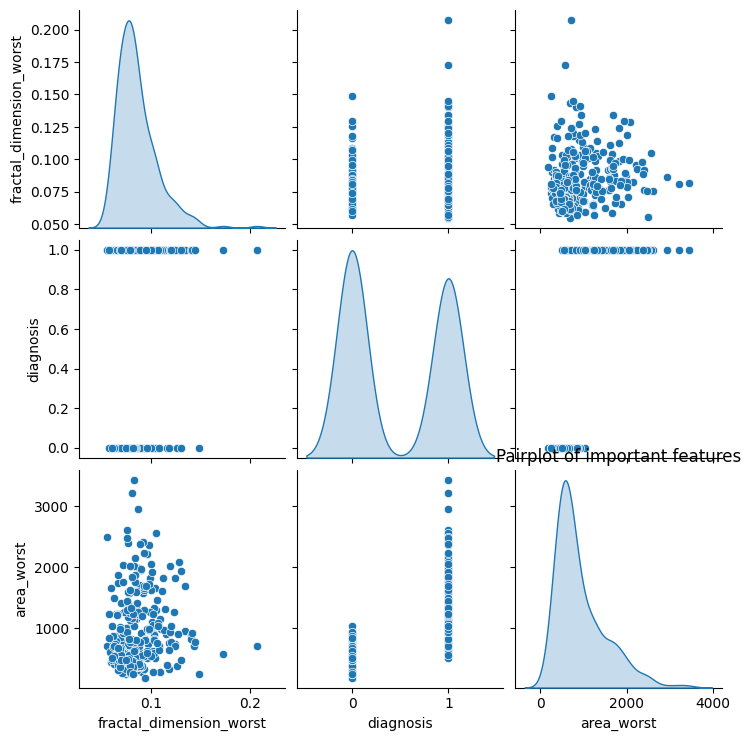

In [12]:
# Pairplot to visualize feature relationships
sns.pairplot(dataset[important_columns], diag_kind='kde')
plt.title("Pairplot of important features")
plt.show()

In [13]:
# Splitting the dataset into independent features (X) and the target variable (y)
X = dataset.drop(columns=['diagnosis'])
y = dataset['diagnosis']

print("\nShape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (317, 31)
Shape of y (target): (317,)


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


In [15]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Train the Decision Tree model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

In [17]:
# Evaluate model performance
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("\nTraining Score:", train_score)
print("Testing Score:", test_score)



Training Score: 0.9789029535864979
Testing Score: 0.9375


In [18]:
# Print some predictions and their true values
print("\nPredictions for the first 10 test samples:", y_pred[:10])
print("Actual values for the first 10 test samples:", y_test[:10].values)



Predictions for the first 10 test samples: [0 0 1 1 0 0 0 1 0 0]
Actual values for the first 10 test samples: [0 0 1 1 0 0 0 1 0 0]


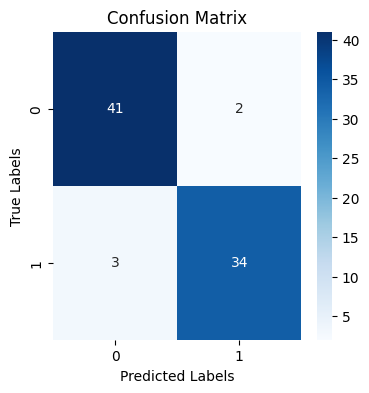

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [20]:
# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print("Accuracy       :", accuracy)
print("F1 Score       :", f1)
print("Precision Score:", precision)
print("Recall Score   :", recall)


Model Performance Metrics:
Accuracy       : 0.9375
F1 Score       : 0.9315068493150684
Precision Score: 0.9444444444444444
Recall Score   : 0.918918918918919


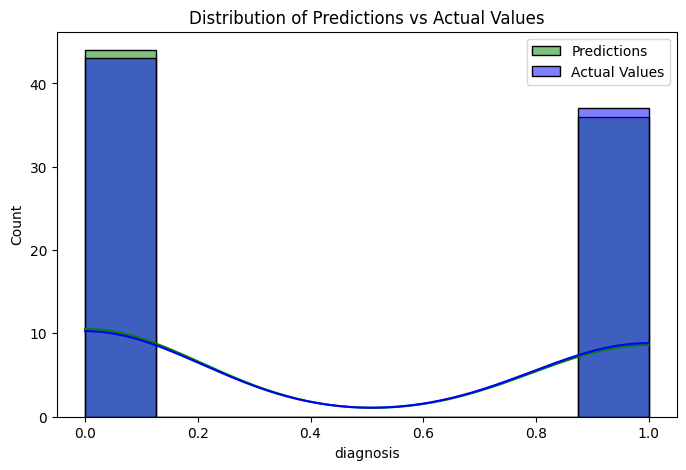

In [21]:
#  Distribution of predictions vs actual values
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, kde=True, color='green', label='Predictions')
sns.histplot(y_test, kde=True, color='blue', label='Actual Values')
plt.title("Distribution of Predictions vs Actual Values")
plt.legend()
plt.show()